In [29]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [2]:
ls

Lab_customer_analysis_round_6.ipynb
lab customer analysis round 3 Mary.ipynb
marketing_customer_analysis.csv*


In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
print(data.dtypes)
display(data)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
data['Response'].unique()
data['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [7]:
data1 = data.copy()

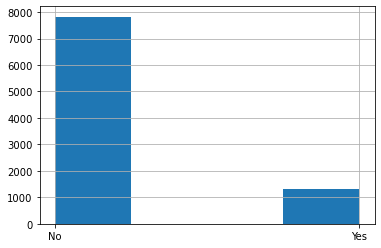

In [8]:
data1['Response'].hist(bins=4)
plt.show()

In [9]:
data1['Sales Channel'].unique()
data1['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

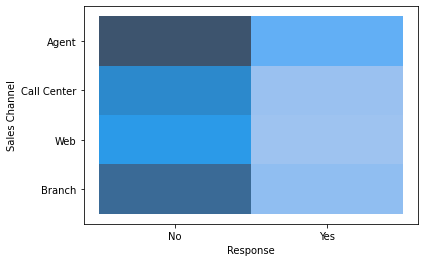

In [10]:
sns.histplot(x=data1['Response'], y=data1['Sales Channel'], data=data1, bins = 20)
plt.show()

In [11]:
data1['Total Claim Amount'].unique()
data1['Total Claim Amount'].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: Total Claim Amount, Length: 5106, dtype: int64

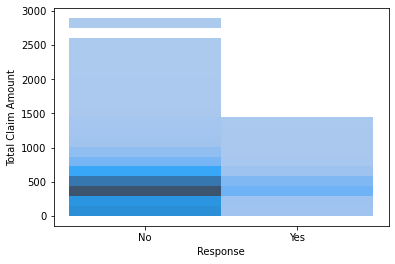

In [12]:
sns.histplot(x=data1['Response'], y=data1['Total Claim Amount'], data=data, bins = 20)
plt.show()

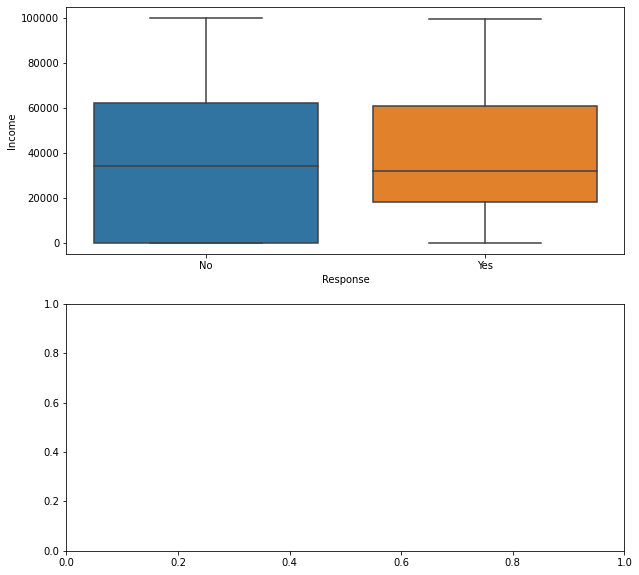

In [13]:
fig, ax1 = plt.subplots(2,1,figsize=(10,10)) # figsize=(width,height)
sns.boxplot(x=data1['Response'], y=data1['Income'], data=data, ax = ax1[0])
#sns.histplot(x=data1['Response'], hue=data1['Income'], data=data, ax = ax1[1])
plt.show()


Complete the following task
----------------------------------
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

- Use Matplotlib to construct histograms

- Do the distributions for different numerical variables look like a normal distribution? It does not have the normal distribution. 

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [14]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
display(data.isna().sum())
print(data.shape)

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

(9134, 24)


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [17]:
data1 = data[['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
             'Number of Open Complaints','Number of Policies','Total Claim Amount']].copy()
data1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [18]:
print(data1.shape)
print(list(data1.columns))

(9134, 8)
['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [19]:
# Define variable
y = data1['Total Claim Amount']
X_new = data1.drop(['Total Claim Amount'], axis=1) # x2 -> col2, x3 -> col3 elimina la ultima columna porque será nuestra X

lm2 = LinearRegression()
lm2.fit(X_new,y)
print("The coefficient of determination of the prediction. ",lm2.score(X_new,y))

y_pred2 = lm2.predict(X_new)
print("The MSE is: ", mean_squared_error(y_pred2,y))


The coefficient of determination of the prediction.  0.5186628226558787
The MSE is:  40615.74326224916


In [20]:
X_new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [21]:
# b1 = lm.coef_ 
list(zip(list(X_new.columns),list(lm2.coef_)))

[('Customer Lifetime Value', -0.0006747234528575028),
 ('Income', -0.0032934152625038043),
 ('Monthly Premium Auto', 5.342545397049085),
 ('Months Since Last Claim', -0.1457210181812756),
 ('Months Since Policy Inception', -0.10232192643359246),
 ('Number of Open Complaints', -1.3716069471349597),
 ('Number of Policies', 0.24856525233166216)]

In [22]:
# Interception -> b0
print("Interception b0: ", lm2.intercept_)
print("Coeficient b1: ", lm2.coef_)

Interception b0:  72.39096819184249
Coeficient b1:  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


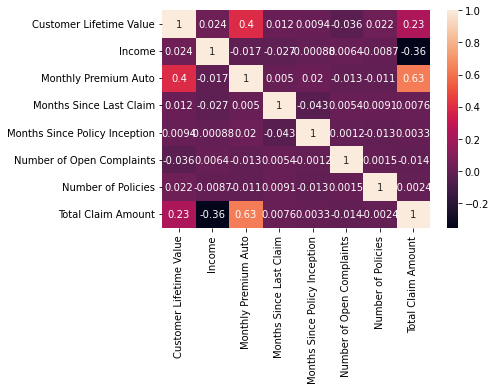

In [23]:
correlations_matrix = data1.corr()
sns.heatmap(correlations_matrix, annot=True) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

In [24]:
def create_linear_model(X,y):
    lm = LinearRegression()
    lm.fit(X,y)
    print("The intercept of the model is b0: ",lm.intercept_)
    print("The coeficients of the model are b1: ",lm.coef_)
    y_pred = lm.predict(X)
    r2 = lm.score(X,y)
    mse = mean_squared_error(y_pred,y)
    print("The r2 of the model is: {:.3f}".format(r2))
    print("The MSE of the model is: {:.2f}".format(mse))
    c = list(zip(list(X.columns),list(lm.coef_))) 
    print(c)   

    return lm, r2, mse

In [25]:
def create_linear_model(X,y):
    lm = LinearRegression()
    lm.fit(X,y)
    print("The intercept of the model is b0: ",lm.intercept_)
    print("The coeficients of the model are b1: ",lm.coef_)
    y_pred = lm.predict(X)
    r2 = lm.score(X,y)
    mse = mean_squared_error(y_pred,y)
    print("The r2 of the model is: {:.3f}".format(r2))
    print("The MSE of the model is: {:.2f}".format(mse))
    c = list(zip(list(X.columns),list(lm.coef_))) 
    print(c)   

    return lm, r2, mse

In [26]:
my_model, my_model_r2, my_model_mse = create_linear_model(X_new,y)

The intercept of the model is b0:  72.39096819184249
The coeficients of the model are b1:  [-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]
The r2 of the model is: 0.519
The MSE of the model is: 40615.74
[('Customer Lifetime Value', -0.0006747234528575028), ('Income', -0.0032934152625038043), ('Monthly Premium Auto', 5.342545397049085), ('Months Since Last Claim', -0.1457210181812756), ('Months Since Policy Inception', -0.10232192643359246), ('Number of Open Complaints', -1.3716069471349597), ('Number of Policies', 0.24856525233166216)]


In [27]:
my_model.coef_

array([-6.74723453e-04, -3.29341526e-03,  5.34254540e+00, -1.45721018e-01,
       -1.02321926e-01, -1.37160695e+00,  2.48565252e-01])